# Import
---

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN, LSTM, GlobalMaxPooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist

from sklearn.metrics import confusion_matrix
import itertools

# Data
---

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


# Model
---

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7431 - accuracy: 0.7505 - val_loss: 0.2973 - val_accuracy: 0.9102
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2217 - accuracy: 0.9309 - val_loss: 0.1749 - val_accuracy: 0.9462
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1616 - accuracy: 0.9505 - val_loss: 0.1322 - val_accuracy: 0.9577
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1280 - accuracy: 0.9607 - val_loss: 0.1315 - val_accuracy: 0.9600
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1117 - accuracy: 0.9661 - val_loss: 0.1003 - val_accuracy: 0.9697
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0983 - accuracy: 0.9700 - val_loss: 0.1065 - val_accuracy: 0.9677
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0872 - accuracy: 0.9739 - val_loss: 0.0831 -

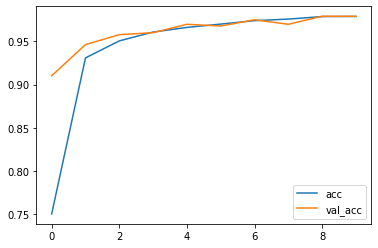

In [36]:
# Build
i = Input(shape=(X_train[0].shape))
x = LSTM(32, activation='relu')(i)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=10, batch_size=32)

# Plot
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Confusion Matrix

confusion matrix, without normalization
[[ 973    0    1    0    2    0    2    1    1    0]
 [   0 1120    2    0    0    0    2    2    9    0]
 [   2    0 1022    1    0    0    1    3    3    0]
 [   0    0    9  975    0   11    0    5    4    6]
 [   1    0    0    0  954    0    3    2    2   20]
 [   1    1    3    4    0  872    3    1    5    2]
 [   2    2    4    0    1    3  941    0    5    0]
 [   1    3    7    2    1    0    0  996    0   18]
 [   5    0    4    0    0    2    1    3  958    1]
 [   2    3    1    1    4    1    1    5   13  978]]


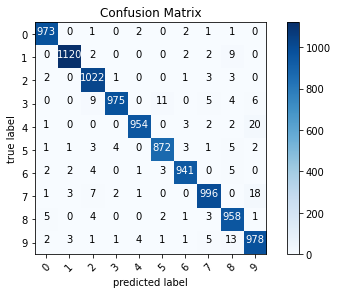

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='w' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'true label: 9  predicted label: 4')

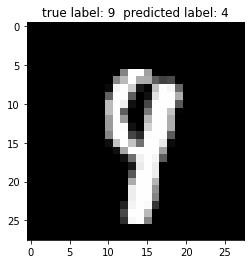

In [58]:
misclassified = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'true label: {y_test[i]}  predicted label: {p_test[i]}')